### **Importing necessary libraries**

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib import rcParams
import seaborn as sns
from sklearn import preprocessing
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix 
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn import svm
from sklearn.linear_model import LogisticRegression

### **Importing game data**

In [2]:
df = pd.read_csv("/content/nba.games.stats.csv") #load dataset

In [3]:
df.head() # showing top 5 rows

,Unnamed: 0,Team,Game,Date,Home,Opponent,WINorLOSS,TeamPoints,OpponentPoints,FieldGoals,FieldGoalsAttempted,FieldGoals.,X3PointShots,X3PointShotsAttempted,X3PointShots.,FreeThrows,FreeThrowsAttempted,FreeThrows.,OffRebounds,TotalRebounds,Assists,Steals,Blocks,Turnovers,TotalFouls,Opp.FieldGoals,Opp.FieldGoalsAttempted,Opp.FieldGoals.,Opp.3PointShots,Opp.3PointShotsAttempted,Opp.3PointShots.,Opp.FreeThrows,Opp.FreeThrowsAttempted,Opp.FreeThrows.,Opp.OffRebounds,Opp.TotalRebounds,Opp.Assists,Opp.Steals,Opp.Blocks,Opp.Turnovers,Opp.TotalFouls
0,1,ATL,1,10/29/2014,Away,TOR,L,102,109,40,80,0.500,13,22,0.591,9,17,0.529,10,42,26,6,8,17,24,37,90,0.411,8,26,0.308,27,33,0.818,16,48,26,13,9,9,22
1,2,ATL,2,11/1/2014,Home,IND,W,102,92,35,69,0.507,7,20,0.350,25,33,0.758,3,37,26,10,6,12,20,31,81,0.383,12,32,0.375,18,21,0.857,11,44,25,5,5,18,26
2,3,ATL,3,11/5/2014,Away,SAS,L,92,94,38,92,0.413,8,25,0.320,8,11,0.727,10,37,26,14,5,13,25,31,69,0.449,5,17,0.294,27,38,0.711,11,50,25,7,9,19,15
3,4,ATL,4,11/7/2014,Away,CHO,L,119,122,43,93,0.462,13,33,0.394,20,26,0.769,7,38,28,8,3,19,33,48,97,0.495,6,21,0.286,20,27,0.741,11,51,31,6,7,19,30
4,5,ATL,5,11/8/2014,Home,NYK,W,103,96,33,81,0.407,9,22,0.409,28,36,0.778,12,41,18,10,5,8,17,40,84,0.476,8,21,0.381,8,11,0.727,13,44,26,2,6,15,29


## **Data understanding/ Preprocessing**



In [4]:
# Check columns missing values
df.isnull().sum()

Unnamed: 0                  0
Team                        0
Game                        0
Date                        0
Home                        0
Opponent                    0
WINorLOSS                   0
TeamPoints                  0
OpponentPoints              0
FieldGoals                  0
FieldGoalsAttempted         0
FieldGoals.                 0
X3PointShots                0
X3PointShotsAttempted       0
X3PointShots.               0
FreeThrows                  0
FreeThrowsAttempted         0
FreeThrows.                 0
OffRebounds                 0
TotalRebounds               0
Assists                     0
Steals                      0
Blocks                      0
Turnovers                   0
TotalFouls                  0
Opp.FieldGoals              0
Opp.FieldGoalsAttempted     0
Opp.FieldGoals.             0
Opp.3PointShots             0
Opp.3PointShotsAttempted    0
Opp.3PointShots.            0
Opp.FreeThrows              0
Opp.FreeThrowsAttempted     0
Opp.FreeTh

In [5]:
#drop na values
df.dropna(inplace=True)

In [6]:
# Count unique values of our data
df.nunique()

Unnamed: 0                  9840
Team                          30
Game                          82
Date                         653
Home                           2
Opponent                      30
WINorLOSS                      2
TeamPoints                    84
OpponentPoints                84
FieldGoals                    40
FieldGoalsAttempted           58
FieldGoals.                  312
X3PointShots                  26
X3PointShotsAttempted         56
X3PointShots.                311
FreeThrows                    44
FreeThrowsAttempted           56
FreeThrows.                  296
OffRebounds                   30
TotalRebounds                 50
Assists                       40
Steals                        22
Blocks                        19
Turnovers                     28
TotalFouls                    35
Opp.FieldGoals                40
Opp.FieldGoalsAttempted       58
Opp.FieldGoals.              312
Opp.3PointShots               26
Opp.3PointShotsAttempted      56
Opp.3Point

In [7]:
#drop Date and an Un named column
df.drop(['Date'],axis=1,inplace=True)
df.drop(['Unnamed: 0'],axis=1,inplace=True) #inplace=True changes in actual data

In [8]:
# Check data types for all features
df.dtypes

Team                         object
Game                          int64
Home                         object
Opponent                     object
WINorLOSS                    object
TeamPoints                    int64
OpponentPoints                int64
FieldGoals                    int64
FieldGoalsAttempted           int64
FieldGoals.                 float64
X3PointShots                  int64
X3PointShotsAttempted         int64
X3PointShots.               float64
FreeThrows                    int64
FreeThrowsAttempted           int64
FreeThrows.                 float64
OffRebounds                   int64
TotalRebounds                 int64
Assists                       int64
Steals                        int64
Blocks                        int64
Turnovers                     int64
TotalFouls                    int64
Opp.FieldGoals                int64
Opp.FieldGoalsAttempted       int64
Opp.FieldGoals.             float64
Opp.3PointShots               int64
Opp.3PointShotsAttempted    

In [9]:
# Check the dimension of our dataset
df.shape

(10024, 39)

In [10]:
# Describe the all statistical properties of our dataset
df.describe()

,Game,TeamPoints,OpponentPoints,FieldGoals,FieldGoalsAttempted,FieldGoals.,X3PointShots,X3PointShotsAttempted,X3PointShots.,FreeThrows,FreeThrowsAttempted,FreeThrows.,OffRebounds,TotalRebounds,Assists,Steals,Blocks,Turnovers,TotalFouls,Opp.FieldGoals,Opp.FieldGoalsAttempted,Opp.FieldGoals.,Opp.3PointShots,Opp.3PointShotsAttempted,Opp.3PointShots.,Opp.FreeThrows,Opp.FreeThrowsAttempted,Opp.FreeThrows.,Opp.OffRebounds,Opp.TotalRebounds,Opp.Assists,Opp.Steals,Opp.Blocks,Opp.Turnovers,Opp.TotalFouls
count,10024.000000,10024.000000,10024.000000,10024.000000,10024.000000,10024.000000,10024.000000,10024.000000,10024.000000,10024.000000,10024.000000,10024.000000,10024.000000,10024.000000,10024.000000,10024.000000,10024.000000,10024.000000,10024.000000,10024.000000,10024.000000,10024.000000,10024.000000,10024.000000,10024.000000,10024.000000,10024.000000,10024.000000,10024.000000,10024.000000,10024.000000,10024.000000,10024.000000,10024.000000,10024.000000
mean,41.498005,103.515862,103.515762,38.563647,84.805367,0.455759,9.075718,25.490223,0.354137,17.312849,22.742119,0.762316,10.277833,43.469174,22.522845,7.765662,4.822127,13.652135,20.062849,38.550678,84.822326,0.455513,9.105347,25.578811,0.354087,17.309058,22.748005,0.762012,10.299681,43.489525,22.521049,7.754988,4.823623,13.661313,20.063547
std,23.648601,12.189872,12.207293,5.025957,7.157618,0.054626,3.604645,7.135377,0.098400,5.998311,7.391129,0.104224,3.805734,6.420159,5.116334,2.961365,2.536058,3.872017,4.314883,5.032750,7.141998,0.054777,3.594795,7.086753,0.097852,5.991684,7.383965,0.104231,3.814330,6.410520,5.120805,2.956302,2.533821,3.869222,4.311901
min,1.000000,64.000000,64.000000,19.000000,60.000000,0.271000,0.000000,4.000000,0.000000,1.000000,1.000000,0.143000,0.000000,20.000000,6.000000,0.000000,0.000000,2.000000,7.000000,19.000000,60.000000,0.271000,0.000000,4.000000,0.000000,1.000000,1.000000,0.143000,0.000000,20.000000,6.000000,0.000000,0.000000,2.000000,7.000000
25%,21.000000,95.000000,95.000000,35.000000,80.000000,0.418000,7.000000,21.000000,0.289000,13.000000,17.000000,0.696000,8.000000,39.000000,19.000000,6.000000,3.000000,11.000000,17.000000,35.000000,80.000000,0.418000,7.000000,21.000000,0.289000,13.000000,18.000000,0.696000,8.000000,39.000000,19.000000,6.000000,3.000000,11.000000,17.000000
50%,41.000000,103.000000,103.000000,38.000000,85.000000,0.455000,9.000000,25.000000,0.353000,17.000000,22.000000,0.769000,10.000000,43.000000,22.000000,8.000000,5.000000,13.000000,20.000000,38.000000,85.000000,0.455000,9.000000,25.000000,0.353000,17.000000,22.000000,0.769000,10.000000,43.000000,22.000000,8.000000,5.000000,13.000000,20.000000
75%,62.000000,112.000000,112.000000,42.000000,89.000000,0.494000,11.000000,30.000000,0.419000,21.000000,27.000000,0.833000,13.000000,48.000000,26.000000,10.000000,6.000000,16.000000,23.000000,42.000000,89.000000,0.494000,11.000000,30.000000,0.419000,21.000000,27.000000,0.833000,13.000000,48.000000,26.000000,10.000000,6.000000,16.000000,23.000000
max,82.000000,149.000000,149.000000,58.000000,129.000000,0.684000,25.000000,61.000000,0.750000,44.000000,64.000000,1.000000,38.000000,81.000000,47.000000,21.000000,18.000000,29.000000,42.000000,58.000000,129.000000,0.684000,25.000000,61.000000,0.750000,44.000000,64.000000,1.000000,38.000000,81.000000,47.000000,21.000000,18.000000,29.000000,42.000000


Text(0.5, 1.0, 'Count of Target Class')

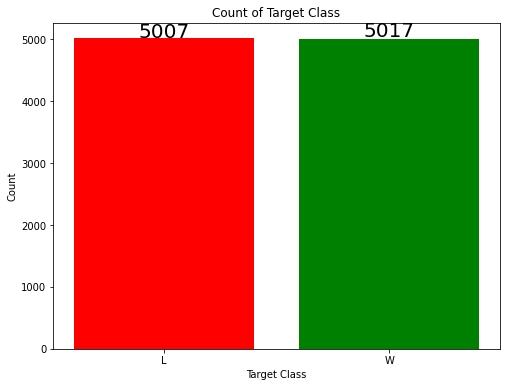

In [11]:
# counting target values
rcParams['figure.figsize'] = 8,6 #setting size of figure
y_bar=df['WINorLOSS'].value_counts()
plt.bar(df['WINorLOSS'].unique(), y_bar, color = ['red', 'green'])
plt.xticks([0, 1])
#add text in figure
plt.text(1,y_bar[0]+20, str(y_bar[0]),fontsize=20,horizontalalignment='center')
plt.text(0,y_bar[1]+20, str(y_bar[1]),fontsize=20,horizontalalignment='center')
plt.xlabel('Target Class')
plt.ylabel('Count')
plt.title('Count of Target Class')

#Label Encoding


In [12]:
#print data types
df.dtypes

Team                         object
Game                          int64
Home                         object
Opponent                     object
WINorLOSS                    object
TeamPoints                    int64
OpponentPoints                int64
FieldGoals                    int64
FieldGoalsAttempted           int64
FieldGoals.                 float64
X3PointShots                  int64
X3PointShotsAttempted         int64
X3PointShots.               float64
FreeThrows                    int64
FreeThrowsAttempted           int64
FreeThrows.                 float64
OffRebounds                   int64
TotalRebounds                 int64
Assists                       int64
Steals                        int64
Blocks                        int64
Turnovers                     int64
TotalFouls                    int64
Opp.FieldGoals                int64
Opp.FieldGoalsAttempted       int64
Opp.FieldGoals.             float64
Opp.3PointShots               int64
Opp.3PointShotsAttempted    

In [13]:
# convert objects to str
df['WINorLOSS'] = df['WINorLOSS'].astype(str)
df['Opponent'] = df['Opponent'].astype(str)
df['Home'] = df['Home'].astype(str)
df['Team'] = df['Team'].astype(str)

In [14]:
#encoding labels
le_winLoss = preprocessing.LabelEncoder()
le_opponent = preprocessing.LabelEncoder()
le_home = preprocessing.LabelEncoder()
le_team = preprocessing.LabelEncoder()

le_winLoss.fit(df['WINorLOSS'])
le_opponent.fit(df['Opponent'])
le_home.fit(df['Home'])
le_team.fit(df['Team'])

df['WINorLOSS'] = le_winLoss.transform(df['WINorLOSS'])
df['Opponent'] = le_opponent.transform(df['Opponent'])
df['Home'] = le_home.transform(df['Home'])
df['Team'] = le_team.transform(df['Team'])

In [15]:
#visualize top 10 values
df.head(10)

,Team,Game,Home,Opponent,WINorLOSS,TeamPoints,OpponentPoints,FieldGoals,FieldGoalsAttempted,FieldGoals.,X3PointShots,X3PointShotsAttempted,X3PointShots.,FreeThrows,FreeThrowsAttempted,FreeThrows.,OffRebounds,TotalRebounds,Assists,Steals,Blocks,Turnovers,TotalFouls,Opp.FieldGoals,Opp.FieldGoalsAttempted,Opp.FieldGoals.,Opp.3PointShots,Opp.3PointShotsAttempted,Opp.3PointShots.,Opp.FreeThrows,Opp.FreeThrowsAttempted,Opp.FreeThrows.,Opp.OffRebounds,Opp.TotalRebounds,Opp.Assists,Opp.Steals,Opp.Blocks,Opp.Turnovers,Opp.TotalFouls
0,0,1,0,27,0,102,109,40,80,0.500,13,22,0.591,9,17,0.529,10,42,26,6,8,17,24,37,90,0.411,8,26,0.308,27,33,0.818,16,48,26,13,9,9,22
1,0,2,1,11,1,102,92,35,69,0.507,7,20,0.350,25,33,0.758,3,37,26,10,6,12,20,31,81,0.383,12,32,0.375,18,21,0.857,11,44,25,5,5,18,26
2,0,3,0,26,0,92,94,38,92,0.413,8,25,0.320,8,11,0.727,10,37,26,14,5,13,25,31,69,0.449,5,17,0.294,27,38,0.711,11,50,25,7,9,19,15
3,0,4,0,4,0,119,122,43,93,0.462,13,33,0.394,20,26,0.769,7,38,28,8,3,19,33,48,97,0.495,6,21,0.286,20,27,0.741,11,51,31,6,7,19,30
4,0,5,1,19,1,103,96,33,81,0.407,9,22,0.409,28,36,0.778,12,41,18,10,5,8,17,40,84,0.476,8,21,0.381,8,11,0.727,13,44,26,2,6,15,29
5,0,6,0,19,1,91,85,27,71,0.380,10,27,0.370,27,28,0.964,9,38,20,7,3,15,16,36,83,0.434,6,26,0.231,7,12,0.583,11,40,23,4,2,15,26
6,0,7,1,28,1,100,97,39,76,0.513,9,20,0.450,13,18,0.722,13,46,23,8,4,18,12,43,86,0.500,5,23,0.217,6,12,0.500,8,30,28,12,8,11,17
7,0,8,1,15,1,114,103,42,75,0.560,11,28,0.393,19,23,0.826,3,36,33,10,5,13,20,35,74,0.473,10,21,0.476,23,25,0.920,5,32,27,10,3,14,20
8,0,9,0,5,0,94,127,40,90,0.444,3,22,0.136,11,13,0.846,11,37,26,6,8,18,12,49,90,0.544,19,31,0.613,10,13,0.769,12,47,39,12,2,13,14
9,0,10,1,13,0,109,114,41,85,0.482,9,27,0.333,18,23,0.783,13,38,22,7,3,10,17,47,87,0.540,6,17,0.353,14,22,0.636,13,44,24,7,0,11,24


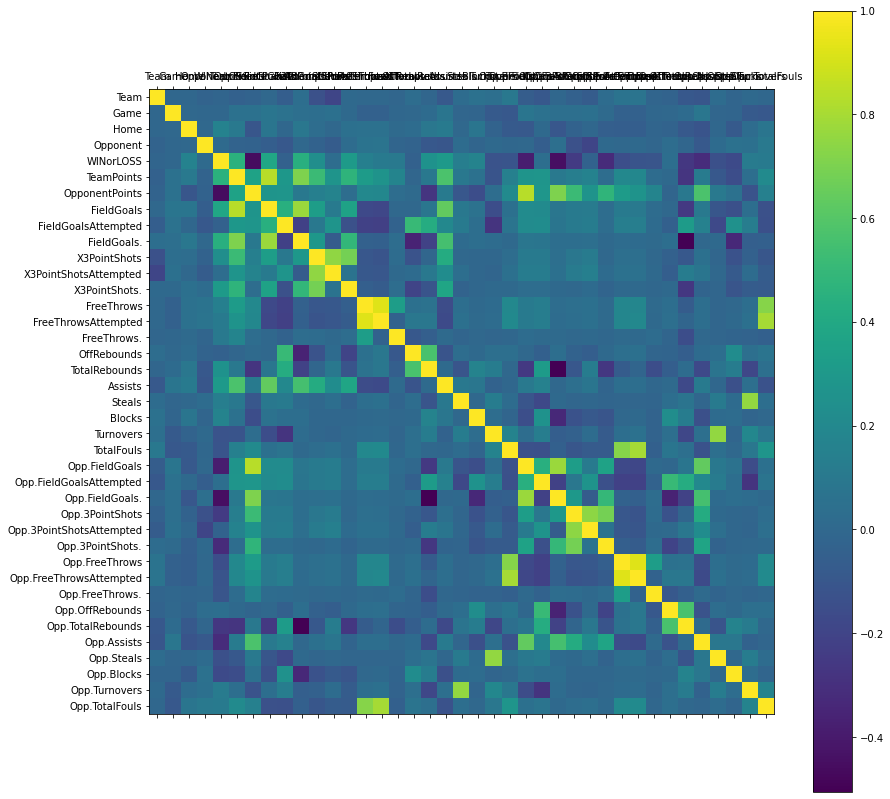

In [16]:
rcParams['figure.figsize'] = 20, 14
plt.matshow(df.corr())
plt.yticks(np.arange(df.shape[1]), df.columns)
plt.xticks(np.arange(df.shape[1]), df.columns)
plt.colorbar()

# **Machine learning model training:**

In [17]:
# seprate data into X and Y
X = df.drop('WINorLOSS', axis=1)
Y = df['WINorLOSS']

In [18]:
#normalizing data
XN=preprocessing.scale(X)
XN=pd.DataFrame(XN,columns=X.columns)
XN

,Team,Game,Home,Opponent,TeamPoints,OpponentPoints,FieldGoals,FieldGoalsAttempted,FieldGoals.,X3PointShots,X3PointShotsAttempted,X3PointShots.,FreeThrows,FreeThrowsAttempted,FreeThrows.,OffRebounds,TotalRebounds,Assists,Steals,Blocks,Turnovers,TotalFouls,Opp.FieldGoals,Opp.FieldGoalsAttempted,Opp.FieldGoals.,Opp.3PointShots,Opp.3PointShotsAttempted,Opp.3PointShots.,Opp.FreeThrows,Opp.FreeThrowsAttempted,Opp.FreeThrows.,Opp.OffRebounds,Opp.TotalRebounds,Opp.Assists,Opp.Steals,Opp.Blocks,Opp.Turnovers,Opp.TotalFouls
0,-1.691717,-1.712576,-0.999202,1.443172,-0.124360,0.449282,0.285801,-0.671398,0.809936,1.088728,-0.489168,2.407264,-1.385934,-0.776932,-2.238715,-0.073007,-0.228849,0.679652,-0.596262,1.253138,0.864674,0.912504,-0.308133,0.724998,-0.812675,-0.307501,0.059436,-0.471006,1.617479,1.388483,0.537174,1.494523,0.703640,0.679410,1.774268,1.648335,-1.204776,0.449117
1,-1.691717,-1.670288,1.000798,-0.404206,-0.124360,-0.943398,-0.709084,-2.208298,0.938086,-0.575874,-0.769475,-0.042043,1.281616,1.387933,-0.041415,-1.912429,-1.007685,0.679652,0.754533,0.464473,-0.426707,-0.014566,-1.500384,-0.535217,-1.323868,0.805275,0.906129,0.213734,0.115323,-0.236742,0.911360,0.183611,0.079635,0.484118,-0.931950,0.069612,1.121389,1.376829
2,-1.691717,-1.628000,-0.999202,1.327711,-0.944754,-0.779553,-0.112153,1.005222,-0.782789,-0.298440,-0.068707,-0.346937,-1.552656,-1.588757,-0.338866,-0.073007,-1.007685,0.679652,2.105329,0.070141,-0.168431,1.144271,-1.500384,-2.215503,-0.118912,-1.142082,-1.210602,-0.614086,1.617479,2.065659,-0.489439,0.183611,1.015643,0.484118,-0.255395,1.648335,1.379852,-1.174378
3,-1.691717,-1.585712,-0.999202,-1.212434,1.270310,1.514272,0.882732,1.144940,0.114263,1.088728,1.052523,0.405133,0.448007,0.440805,0.064132,-0.861331,-0.851918,1.070577,0.079136,-0.718524,1.381226,2.998412,1.877660,1.705164,0.720906,-0.863888,-0.646141,-0.695846,0.449135,0.575870,-0.201604,0.183611,1.171644,1.655867,-0.593673,0.858973,1.379852,2.304540
4,-1.691717,-1.543424,1.000798,0.519483,-0.042321,-0.615709,-1.107038,-0.531679,-0.892632,-0.021007,-0.489168,0.557580,1.781782,1.793845,0.150489,0.452542,-0.384616,-0.884045,0.754533,0.070141,-1.459812,-0.709869,0.287992,-0.115145,0.374024,-0.307501,-0.646141,0.275054,-1.553740,-1.591095,-0.335927,0.707976,0.079635,0.679410,-1.946782,0.464293,0.346001,2.072612
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10019,0.173850,0.190380,-0.999202,0.750405,0.942152,-0.288019,1.280686,0.306630,1.121158,0.811294,-0.068707,1.279160,-0.719046,-0.641628,-0.386842,-0.861331,-0.851918,1.266039,2.780727,1.253138,0.348121,0.912504,-0.308133,-0.395193,-0.082398,-1.142082,-1.069487,-0.777606,0.616041,0.982176,-0.594979,0.970158,0.859642,-1.664089,0.082882,-0.325068,2.413703,-0.478594
10020,0.173850,0.232668,1.000798,1.096789,-0.698636,-1.271087,-0.311130,-0.391961,-0.087116,-0.298440,-0.629322,0.273013,-0.719046,-1.182844,1.599363,-0.335782,1.017288,-0.102196,1.429931,1.253138,0.864674,-0.246334,-1.102967,0.584974,-1.542951,-0.029307,0.765013,-0.654966,-0.719209,-0.643048,-0.383899,0.183611,0.079635,-0.687631,1.097714,-0.719749,0.604464,-1.174378
10021,0.173850,0.274956,-0.999202,1.443172,-1.765149,-2.336078,-1.107038,-0.671398,-0.782789,-0.575874,-1.330090,0.852310,-1.385934,-0.776932,-2.238715,-0.861331,0.082685,0.288728,0.079136,0.464473,-0.426707,-0.478101,-2.692634,-0.955288,-2.455797,-0.585695,0.200552,-0.971787,0.115323,-0.101306,0.537174,0.707976,0.391637,-1.664089,-0.255395,-0.719749,0.346001,-0.246666
10022,0.173850,0.317244,1.000798,-0.173284,0.778073,0.121592,0.484778,-0.391961,0.809936,0.533860,0.071447,0.699863,0.448007,-0.100412,1.407459,-1.386880,-1.319219,0.484190,0.754533,0.858806,-0.684983,0.448969,0.089284,1.145069,-0.666620,-0.029307,0.341667,-0.338146,0.115323,0.305000,-0.403088,2.018888,1.483647,-0.101757,-1.608504,-1.114429,0.604464,1.144901


In [19]:
X=XN

In [20]:
#split data into train and test variable 
from sklearn.model_selection import train_test_split
train_x, test_x, train_y, test_y = train_test_split(X,Y, test_size=0.3) #30% Data for test and 70% for train

In [21]:
#initializing lists to store data
ModelName=[]
TestAccuracy=[]
TrainAccuracy=[]
PredictedResult=[]
ConfusionMatrix=[]
Probes=[]
models=[]

In [22]:
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
#create pipelines
pipelines = []
pipelines.append(LogisticRegression())
pipelines.append(KNeighborsClassifier(n_neighbors=5))
names = ["Logistic Regression",'KNN']
i=0
for model in pipelines:
    kfold = KFold(n_splits=10, random_state=21,shuffle=True)
    cv_results = cross_val_score(model, train_x, train_y, cv=kfold, scoring='accuracy')

    ModelName.append(names[i]) #append model name in list
    model.fit(train_x, train_y) #train model
    y_predicted = model.predict(test_x) #predict results
    PredictedResult.append(list(y_predicted)) #append results in list
    train_Acc = model.score(train_x, train_y) # calculate training accuracy
    print('train accuracy for ',names[i],'=',train_Acc) #print traning accuracy
    TrainAccuracy.append(train_Acc) #append train accuracy in list
    test_Acc = cross_val_score(model, train_x, train_y, cv=kfold, scoring='accuracy') # calculate test accuracy
    TestAccuracy.append(test_Acc.mean()) # apppend accuracy value in list
    print('Mean of K-fold test accuracy for ',names[i],'=',test_Acc.mean()) #print test accuracy 
    print('\n') 
    ConfusionMatrix.append(confusion_matrix(test_y,y_predicted)) # store confussion matrix in list
    models.append(model)
    i+=1

train accuracy for  Logistic Regression = 0.9987172177879133
Mean of K-fold test accuracy for  Logistic Regression = 0.9977193752514723


train accuracy for  KNN = 0.93942417331813
Mean of K-fold test accuracy for  KNN = 0.8878267107225739




## **Evaluation/Results:**

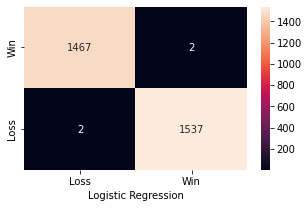

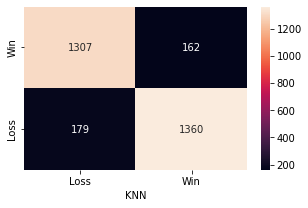

In [23]:
#plot confussion matrix
for i in range(len(ModelName)):
  df_cm = pd.DataFrame(ConfusionMatrix[i], index = ['Win','Loss'],columns = ['Loss','Win'])
  plt.figure(figsize = (5,3))
  sns.heatmap(df_cm, annot=True, fmt='g')
  plt.xlabel(ModelName[i])

In [24]:
Sensitivity=[]
Specificity=[]
Precision=[]

for i in range(len(ModelName)):
  TP=ConfusionMatrix[i][0][0]
  TN=ConfusionMatrix[i][0][1]
  FP=ConfusionMatrix[i][1][1]
  FN=ConfusionMatrix[i][1][0]
  # Sensitivity, hit rate, recall, or true positive rate
  TPR = TP/(TP+FN)
  Sensitivity.append(TPR)
  # Specificity or true negative rate
  TNR = TN/(TN+FP) 
  Specificity.append(TNR)
  # Precision or positive predictive value
  PPV = TP/(TP+FP)
  Precision.append(PPV)

Text(0, 0.5, 'Sensitivity Vlaues')

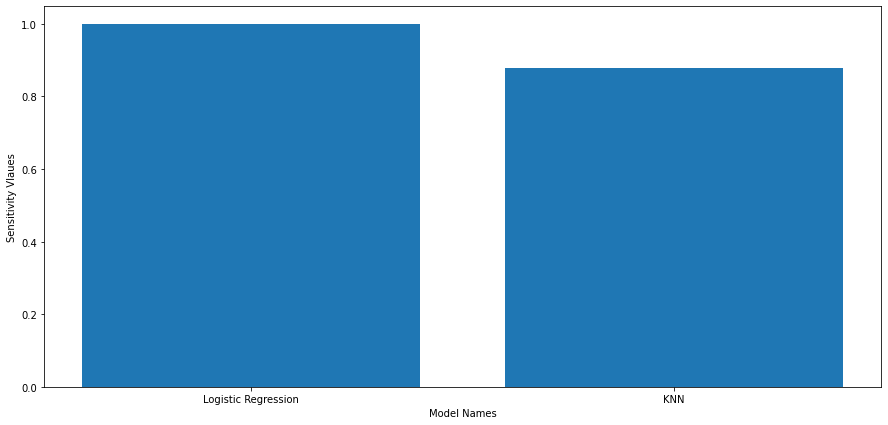

In [25]:
rcParams['figure.figsize'] = 15,7
plt.bar(ModelName,Sensitivity)
plt.xticks(ModelName)
plt.xlabel('Model Names')
plt.ylabel('Sensitivity Vlaues')

Text(0, 0.5, 'Precision Vlaues')

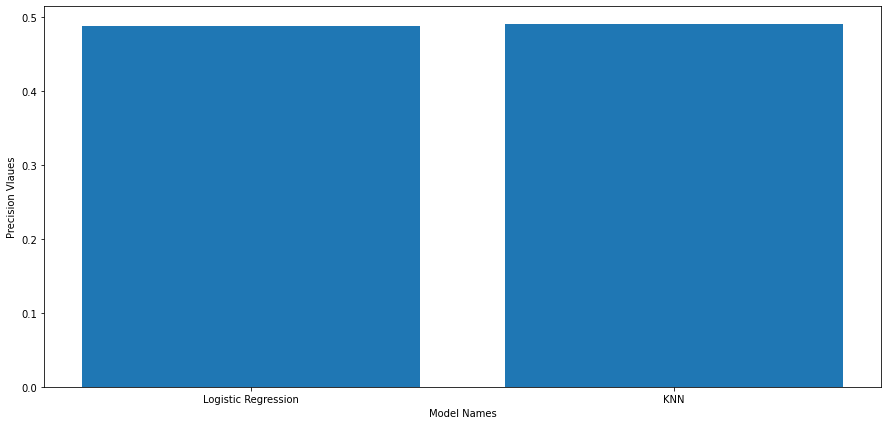

In [26]:
rcParams['figure.figsize'] = 15,7
plt.bar(ModelName,Precision)
plt.xticks(ModelName)
plt.xlabel('Model Names')
plt.ylabel('Precision Vlaues')

Text(0, 0.5, 'Train Accuracy Vlaues')

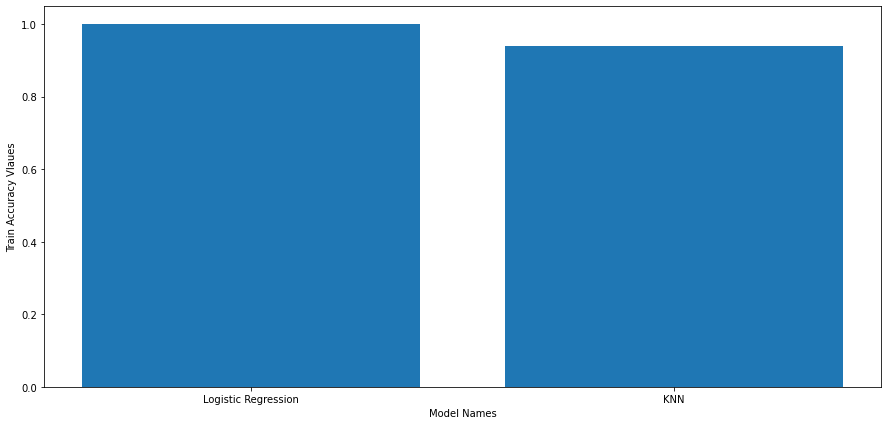

In [27]:
rcParams['figure.figsize'] = 15,7
plt.bar(ModelName,TrainAccuracy)
plt.xticks(ModelName)
plt.xlabel('Model Names')
plt.ylabel('Train Accuracy Vlaues')

Text(0, 0.5, 'Test Accuracy Vlaues')

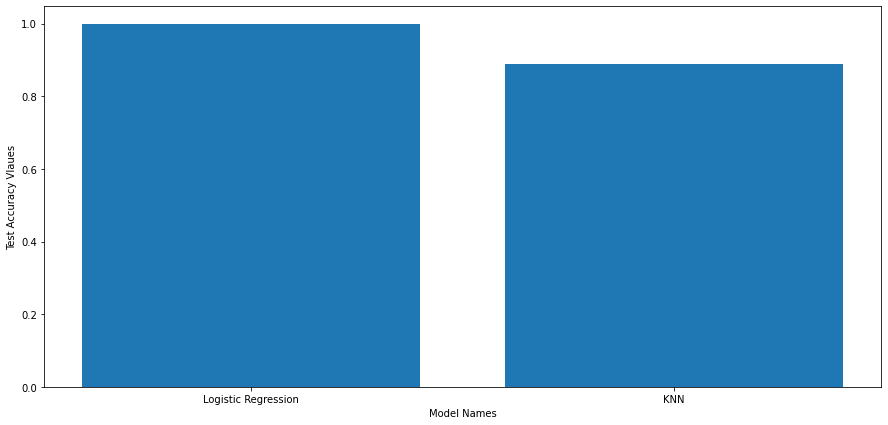

In [28]:
rcParams['figure.figsize'] = 15,7
plt.bar(ModelName,TestAccuracy)
plt.xticks(ModelName)
plt.xlabel('Model Names')
plt.ylabel('Test Accuracy Vlaues')

In [29]:
import pandas as pd
data = {'Senstivity':Sensitivity,'Specificty':Specificity,'Precision':Precision,'Train Accuracy':TrainAccuracy,'Test Accuracy':TestAccuracy}
df1 = pd.DataFrame(data, index=ModelName)
df1

,Senstivity,Specificty,Precision,Train Accuracy,Test Accuracy
Logistic Regression,0.998639,0.001300,0.488349,0.998717,0.997719
KNN,0.879542,0.106439,0.490064,0.939424,0.887827


#**Linear Regression**


In [30]:
df = pd.read_csv("/content/kc_house_data.csv")

In [31]:
df.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,10/13/2014,221900.0,3,1.00,1180,5650,1.0,0,0,3,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,6414100192,12/9/2014,538000.0,3,2.25,2570,7242,2.0,0,0,3,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,5631500400,2/25/2015,180000.0,2,1.00,770,10000,1.0,0,0,3,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,2487200875,12/9/2014,604000.0,4,3.00,1960,5000,1.0,0,0,5,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,1954400510,2/18/2015,510000.0,3,2.00,1680,8080,1.0,0,0,3,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503


In [32]:
df.shape

(21597, 21)

In [33]:
df.isnull().sum()

id               0
date             0
price            0
bedrooms         0
bathrooms        0
sqft_living      0
sqft_lot         0
floors           0
waterfront       0
view             0
condition        0
grade            0
sqft_above       0
sqft_basement    0
yr_built         0
yr_renovated     0
zipcode          0
lat              0
long             0
sqft_living15    0
sqft_lot15       0
dtype: int64

In [34]:
df.dropna(inplace=True)

In [35]:
df.describe()

,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
count,2.159700e+04,2.159700e+04,21597.000000,21597.000000,21597.000000,2.159700e+04,21597.000000,21597.000000,21597.000000,21597.000000,21597.000000,21597.000000,21597.000000,21597.000000,21597.000000,21597.000000,21597.000000,21597.000000,21597.000000,21597.000000
mean,4.580474e+09,5.402966e+05,3.373200,2.115826,2080.321850,1.509941e+04,1.494096,0.007547,0.234292,3.409825,7.657915,1788.596842,291.725008,1970.999676,84.464787,98077.951845,47.560093,-122.213982,1986.620318,12758.283512
std,2.876736e+09,3.673681e+05,0.926299,0.768984,918.106125,4.141264e+04,0.539683,0.086549,0.766390,0.650546,1.173200,827.759761,442.667800,29.375234,401.821438,53.513072,0.138552,0.140724,685.230472,27274.441950
min,1.000102e+06,7.800000e+04,1.000000,0.500000,370.000000,5.200000e+02,1.000000,0.000000,0.000000,1.000000,3.000000,370.000000,0.000000,1900.000000,0.000000,98001.000000,47.155900,-122.519000,399.000000,651.000000
25%,2.123049e+09,3.220000e+05,3.000000,1.750000,1430.000000,5.040000e+03,1.000000,0.000000,0.000000,3.000000,7.000000,1190.000000,0.000000,1951.000000,0.000000,98033.000000,47.471100,-122.328000,1490.000000,5100.000000
50%,3.904930e+09,4.500000e+05,3.000000,2.250000,1910.000000,7.618000e+03,1.500000,0.000000,0.000000,3.000000,7.000000,1560.000000,0.000000,1975.000000,0.000000,98065.000000,47.571800,-122.231000,1840.000000,7620.000000
75%,7.308900e+09,6.450000e+05,4.000000,2.500000,2550.000000,1.068500e+04,2.000000,0.000000,0.000000,4.000000,8.000000,2210.000000,560.000000,1997.000000,0.000000,98118.000000,47.678000,-122.125000,2360.000000,10083.000000
max,9.900000e+09,7.700000e+06,33.000000,8.000000,13540.000000,1.651359e+06,3.500000,1.000000,4.000000,5.000000,13.000000,9410.000000,4820.000000,2015.000000,2015.000000,98199.000000,47.777600,-121.315000,6210.000000,871200.000000


In [36]:
df.nunique()

id               21420
date               372
price             3622
bedrooms            12
bathrooms           29
sqft_living       1034
sqft_lot          9776
floors               6
waterfront           2
view                 5
condition            5
grade               11
sqft_above         942
sqft_basement      306
yr_built           116
yr_renovated        70
zipcode             70
lat               5033
long               751
sqft_living15      777
sqft_lot15        8682
dtype: int64

In [37]:
#drop custumer id
df.drop(['id'],axis=1,inplace=True) #inplace=True changes in actual data
df.drop(['date'],axis=1,inplace=True) #inplace=True changes in actual data

In [38]:
df.dtypes

price            float64
bedrooms           int64
bathrooms        float64
sqft_living        int64
sqft_lot           int64
floors           float64
waterfront         int64
view               int64
condition          int64
grade              int64
sqft_above         int64
sqft_basement      int64
yr_built           int64
yr_renovated       int64
zipcode            int64
lat              float64
long             float64
sqft_living15      int64
sqft_lot15         int64
dtype: object

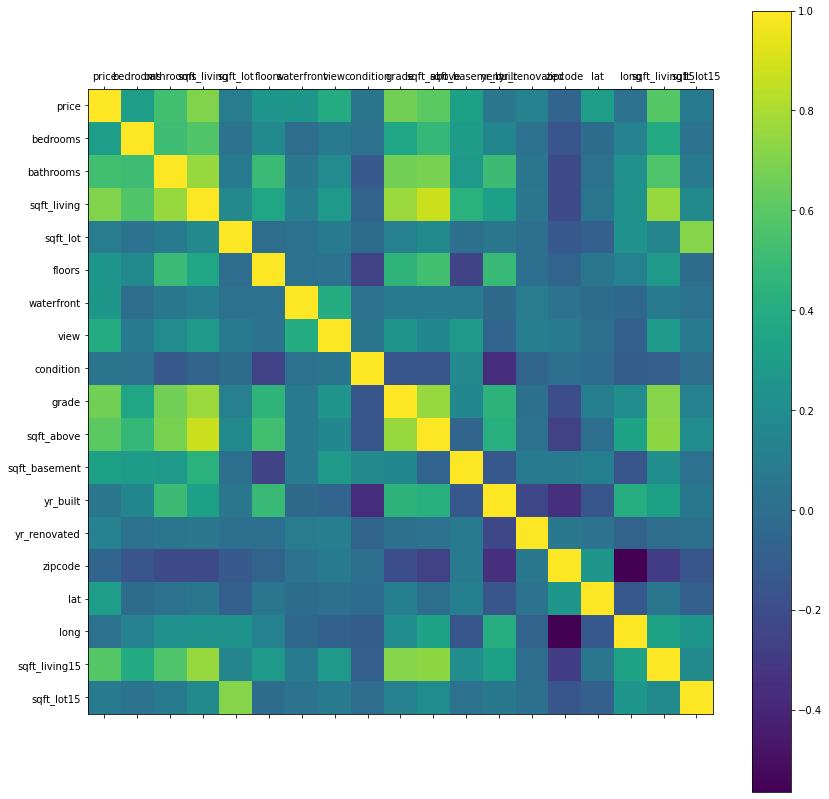

In [39]:
rcParams['figure.figsize'] = 20, 14
plt.matshow(df.corr())
plt.yticks(np.arange(df.shape[1]), df.columns)
plt.xticks(np.arange(df.shape[1]), df.columns)
plt.colorbar()

In [40]:
train=df
X=train.drop(["price"],axis=1)
y=train["price"]

In [41]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.3,random_state=1)
logmodel=LinearRegression()
logmodel.fit(X_train,y_train)

LinearRegression()

In [46]:
from sklearn.metrics import mean_squared_error
import math

# Predict the Labels using the reloaded Model
Ypredict = logmodel.predict(X_test)  

MSE = mean_squared_error(y_test, Ypredict)
RMSE = math.sqrt(MSE)
# Print the Score
print("\n--------\n")
print("Root mean squre error: {0:.2f}".format(RMSE))  
print("\n--------\n")




count=0
for i in Ypredict:
  print(round(i,3),end='\t')
  count+=1
  if count==100:
    count=0;
    print(' ')


--------

Root mean squre error: 189261.52

--------

117114.185	137811.639	416664.049	528022.3	677203.537	396941.989	315997.503	252347.115	516046.855	296283.14	391807.215	249669.522	436429.447	634648.196	395449.392	422779.411	188809.174	83292.458	463576.016	514447.338	323478.48	558514.585	560177.8	942576.363	21275.196	666118.565	458368.015	518192.862	800058.194	513283.786	523389.064	271014.545	376111.311	231760.337	723469.233	329776.673	9462.405	462693.584	351876.479	489308.785	330572.318	213654.655	485069.281	888102.151	307540.575	109131.126	566492.496	646091.817	710323.159	598925.135	554718.364	431253.561	637650.271	404726.911	753794.925	232180.861	4881.228	530564.024	132004.211	176505.044	560552.76	1188510.569	210604.89	355190.222	692821.021	664146.209	785919.212	352246.405	874969.927	957765.886	326464.71	446539.656	792821.207	700450.704	691290.609	548815.264	223185.126	153874.507	420116.77	392615.206	194350.996	830214.832	476089.813	424526.858	454012.59	163221.976	28043.146	42624

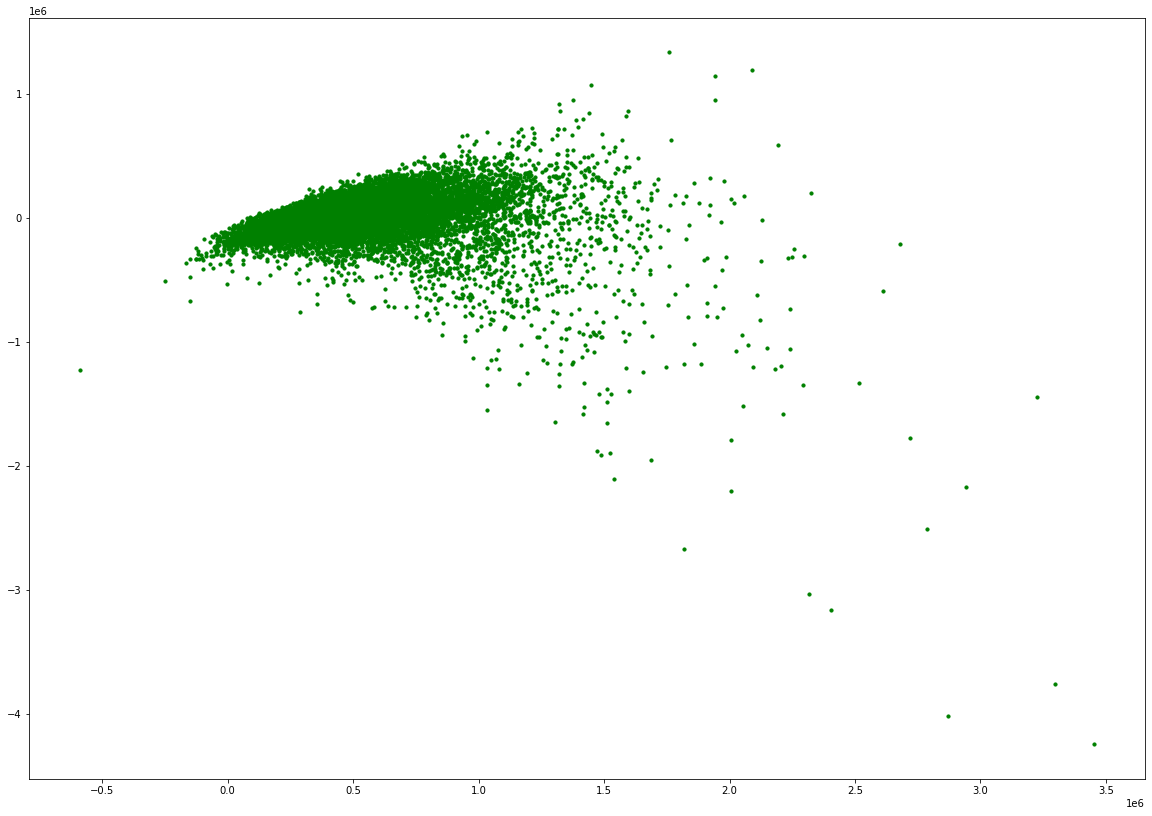

In [43]:
plt.scatter(logmodel.predict(X_train), logmodel.predict(X_train) - y_train,
            color = "green", s = 10, label = 'Train data')